Импортируем необходимые библиотеки

In [1]:
import os
from os import path
from matplotlib import pyplot as plt
import pandas as pd

Импорт данных

In [14]:
# с помощью системной библиотеки OS определяем путь до файла с данными ЭКГ
dirname = os.path.abspath(os.curdir)

# загружаем данные в переменную, содержащую объект библиотеки Pandas - Dataframe
data = pd.read_csv(path.join(os.sep, dirname, 'Total daily precipitation Fisher River near Dallas Jan 01 1988 to Dec .csv'))
# устанавливаем индекс времени для временного ряда и сортируем по нему выборку
data = data.set_index('x').sort_index()

In [15]:
data.head()

,Unnamed: 0
x,
0.0,1
0.0,926
0.0,925
0.0,924
0.0,923


In [17]:
data.describe()

,Unnamed: 0
count,1461.000000
mean,731.000000
std,421.898685
min,1.000000
25%,366.000000
50%,731.000000
75%,1096.000000
max,1461.000000


Графическое представление и описание поведения временного ряда


In [18]:
def plot_assignation(axp, data, xlabel, ylabel, title1):
    axp.plot(data)
    axp.set_xlabel(xlabel)
    axp.set_ylabel(ylabel)
    axp.set_title(title1)

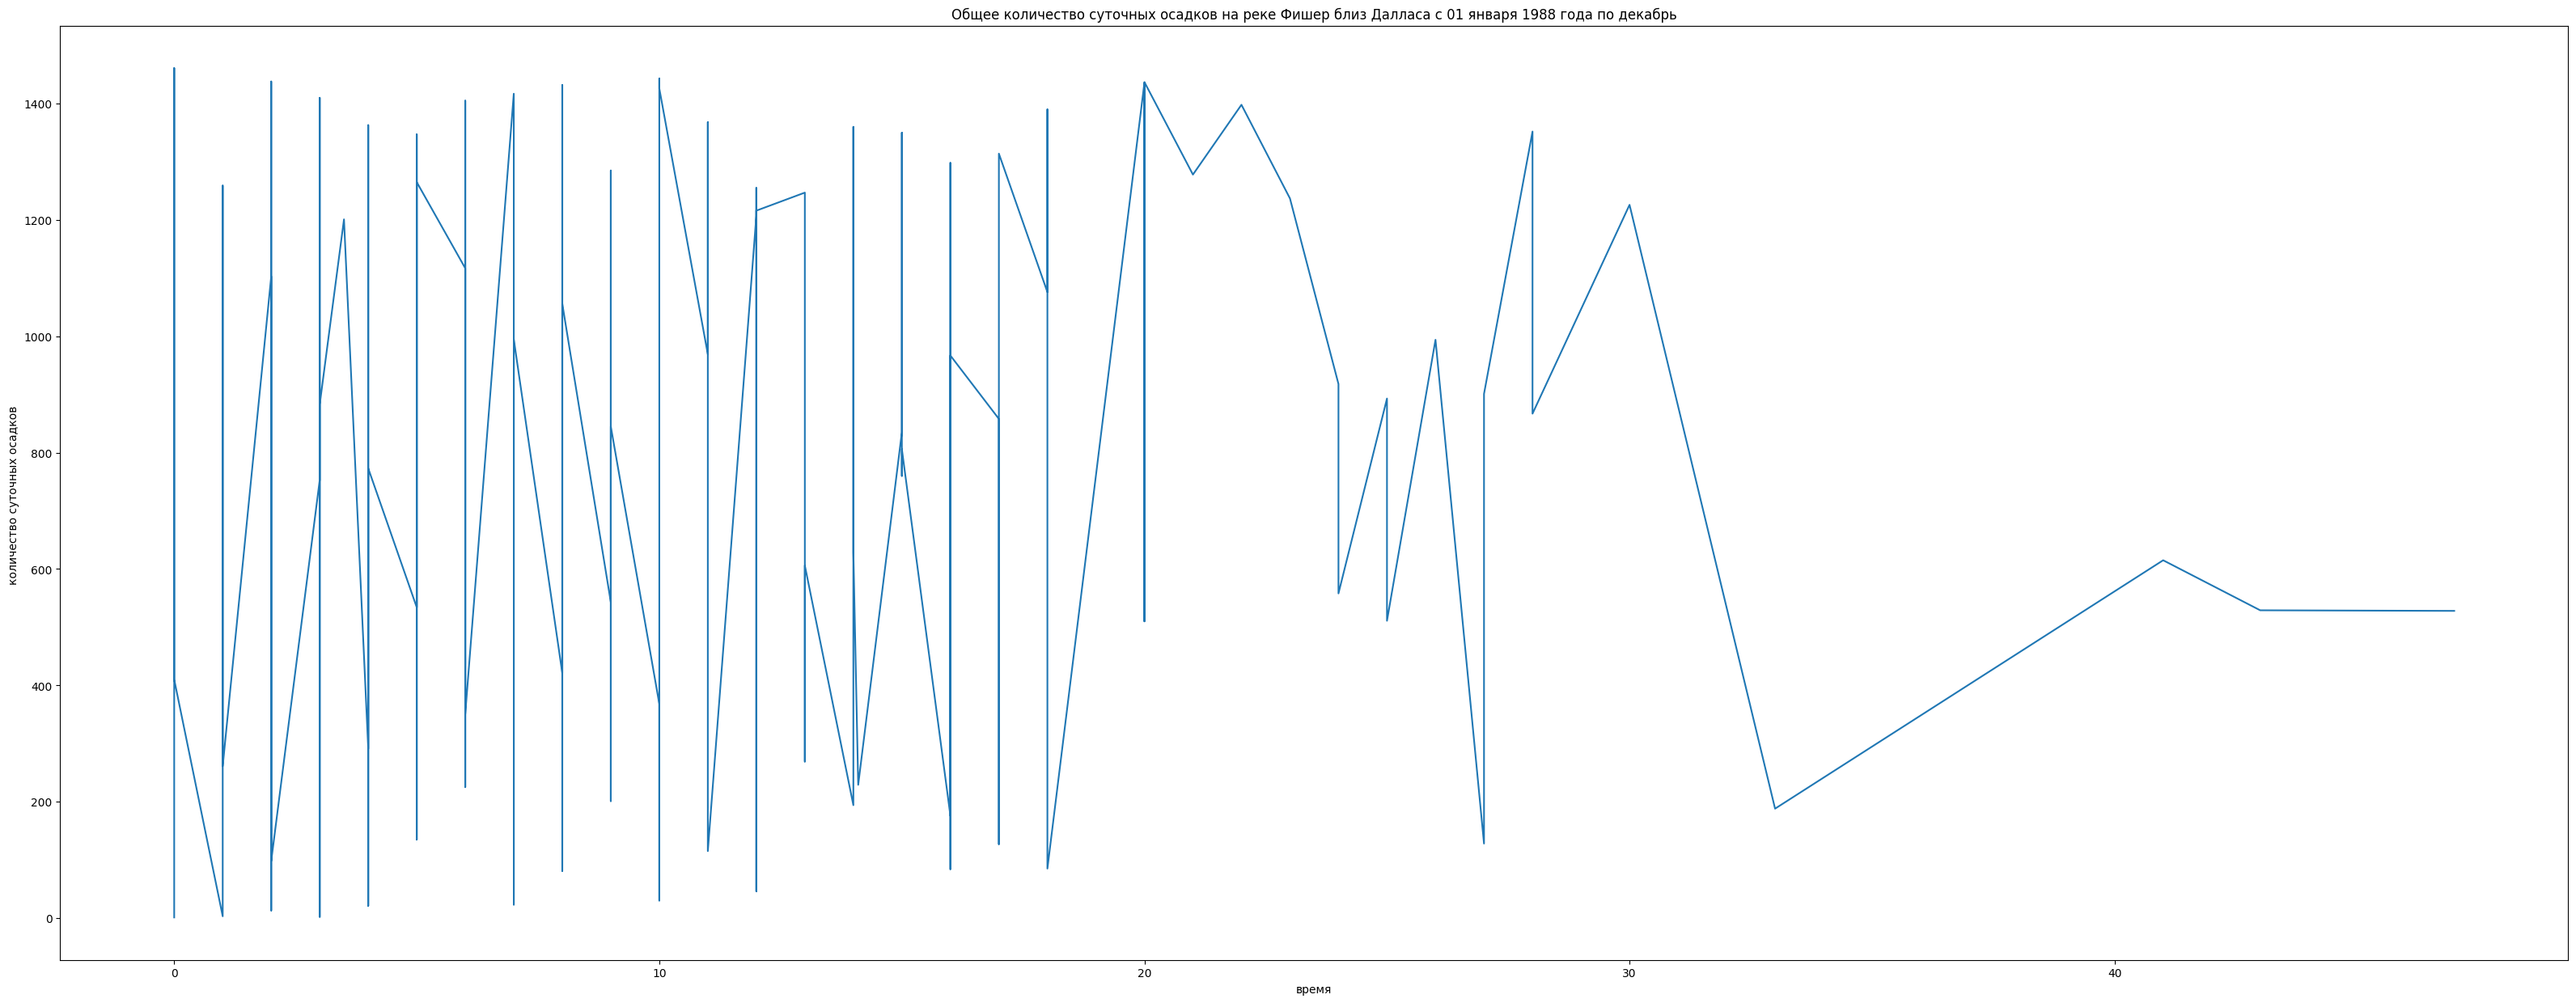

In [28]:
fig, axs = plt.subplots(1,1,figsize=(40, 15))
plot_assignation(axs, data["Unnamed: 0"], 'время', 'количество суточных осадков ','Общее количество суточных осадков на реке Фишер близ Далласа c 01 января 1988 года по декабрь')


Разложения ряда на компоненты

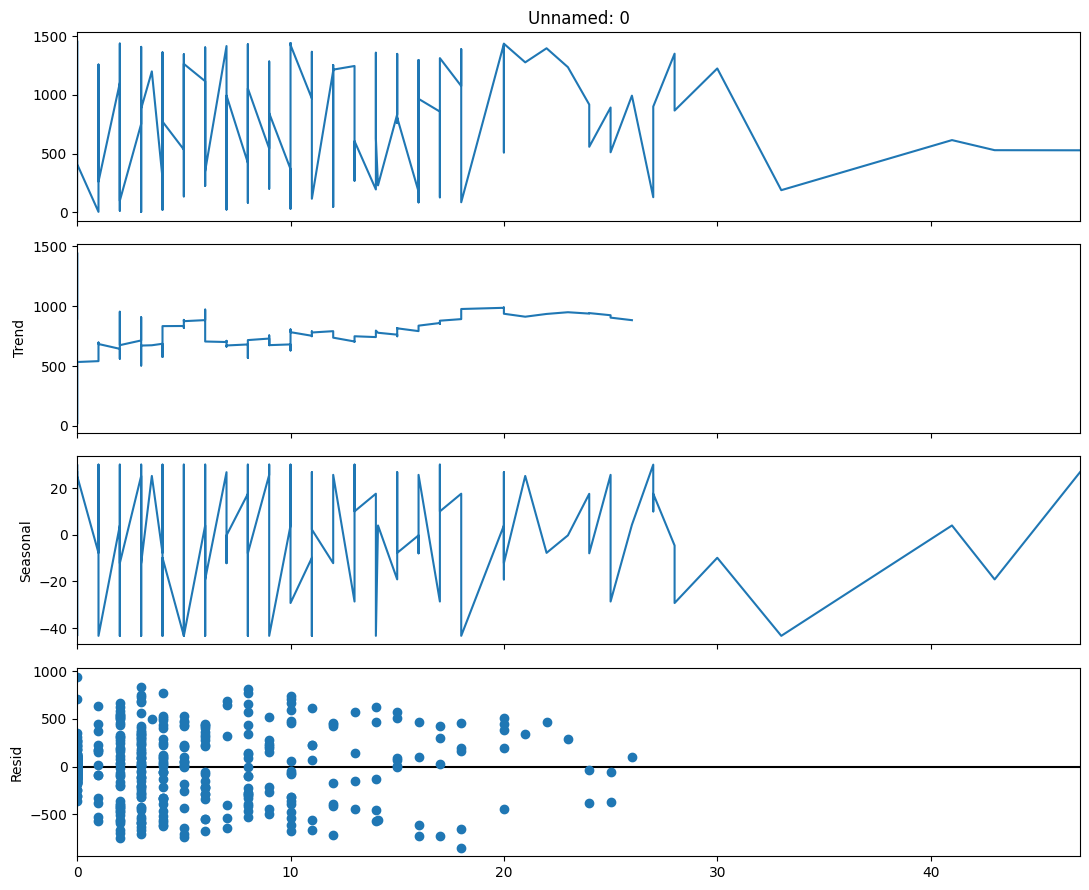

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

# задаем размер графика
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9


# применяем функцию к данным о перевозках
decompose = seasonal_decompose(data["Unnamed: 0"], period=20)
decompose.plot()
plt.show()

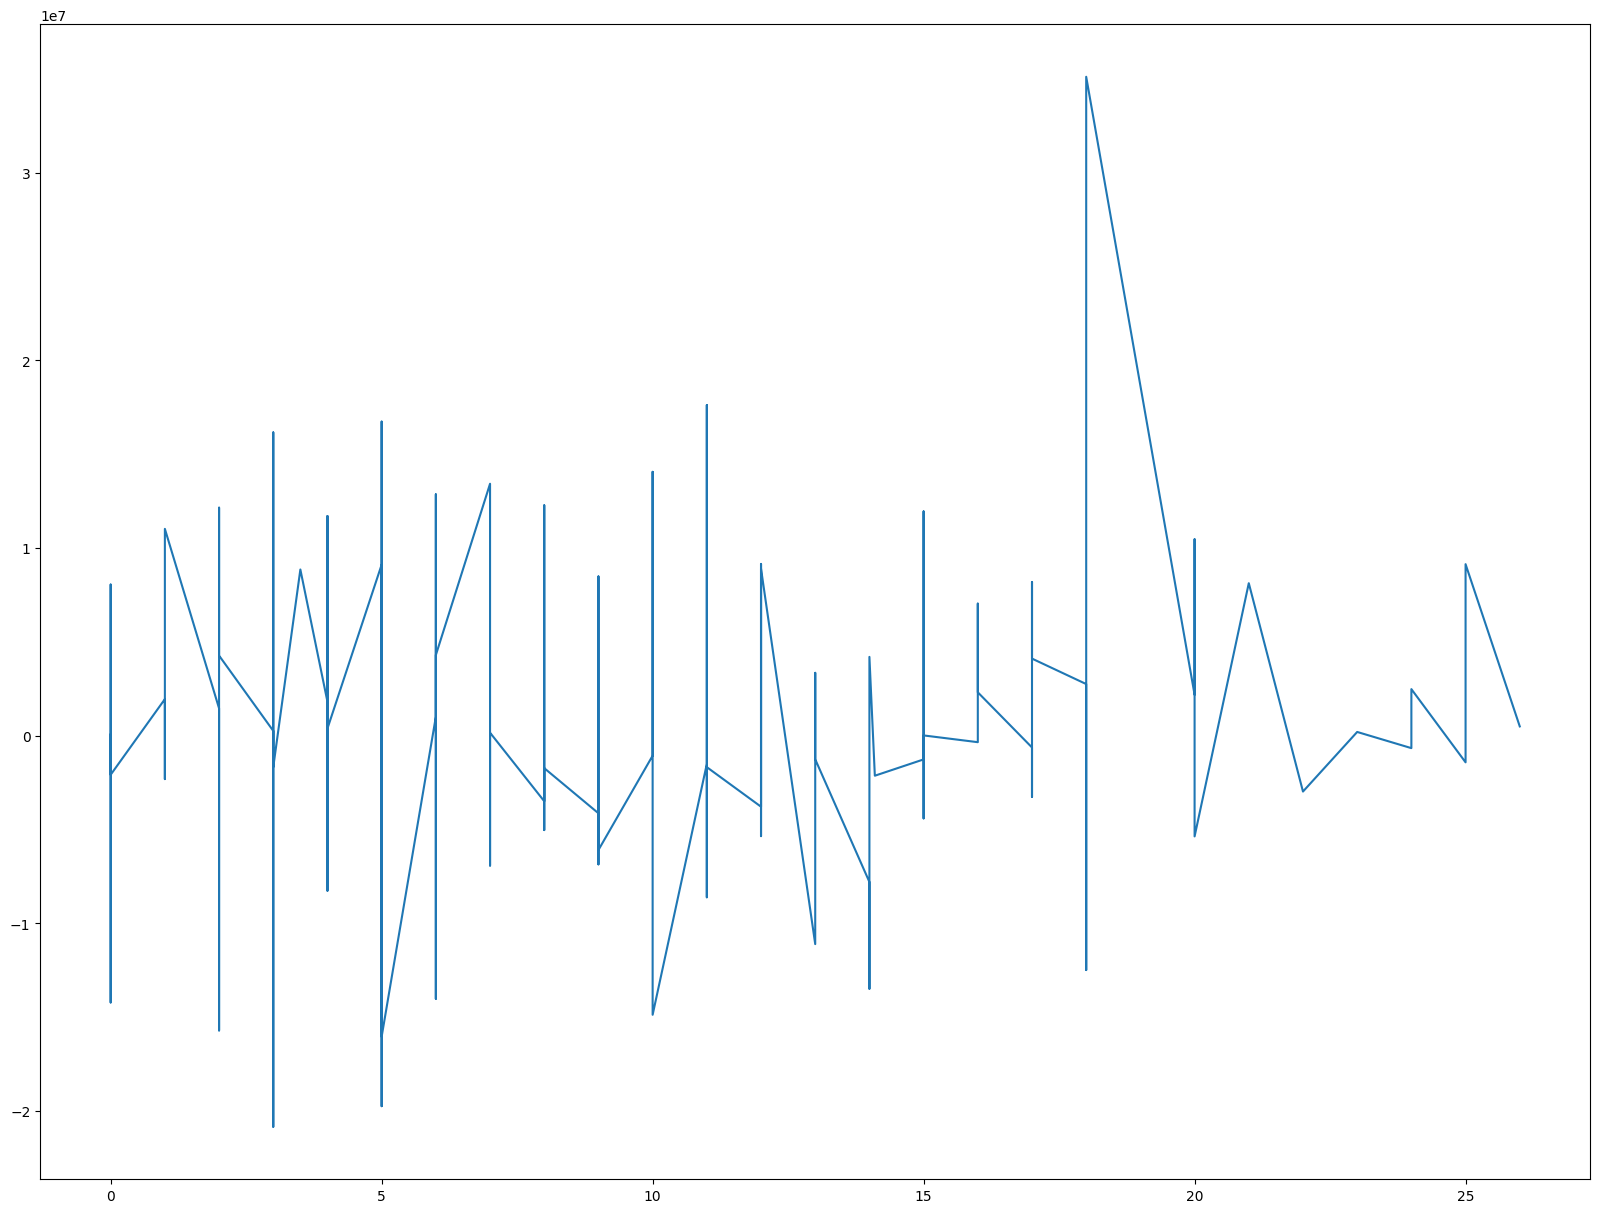

In [31]:
new_ps = decompose.trend*(decompose.seasonal+1)*decompose.resid

fig, axs = plt.subplots(figsize=(20, 15))
 
plt.plot(new_ps)
plt.show()

<Axes: xlabel='x'>

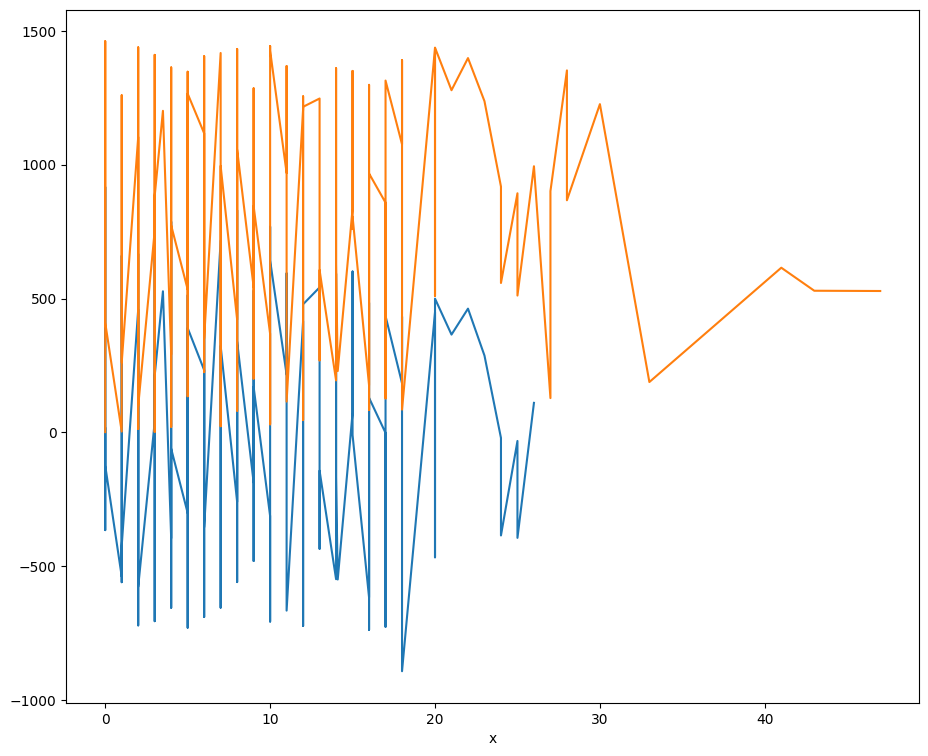

In [32]:
# удаляем компонент тренда из временного ряда...
passengers_r = data["Unnamed: 0"] - decompose.trend
# ...и отрисовываем обработанный и исходный ряды
passengers_r.plot()
data["Unnamed: 0"].plot()

In [34]:
# импортируем функцию, описывающую тест Дики-Фуллера
from statsmodels.tsa.stattools import adfuller

alpha = 0.05
name = "Количество суточных осадков"
ts = data["Unnamed: 0"]

print(f'Тест Дики-Фуллера ряда {name} :')
dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

if dfoutput["p-value"] < alpha:
    print(f"Значение p меньше {alpha * 100}%. Ряд стационарный.")
else:
    print(f"Значение p больше {alpha*100}%. Ряд не стационарный.")

Тест Дики-Фуллера ряда Количество суточных осадков :
Test Statistic                   -1.890125
p-value                           0.336721
#Lags Used                       24.000000
Number of Observations Used    1436.000000
Critical Value (1%)              -3.434912
Critical Value (5%)              -2.863555
Critical Value (10%)             -2.567843
dtype: float64
Значение p больше 5.0%. Ряд не стационарный.


Тренд

C:\Users\User\AppData\Local\Temp\ipykernel_10464\1110318620.py:10: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  plt.plot(ts[window:], label='Реальные значения', color="black")
C:\Users\User\AppData\Local\Temp\ipykernel_10464\1110318620.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.0, 0.5, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(rolling_mean, 'g', label='MA'+str(window),


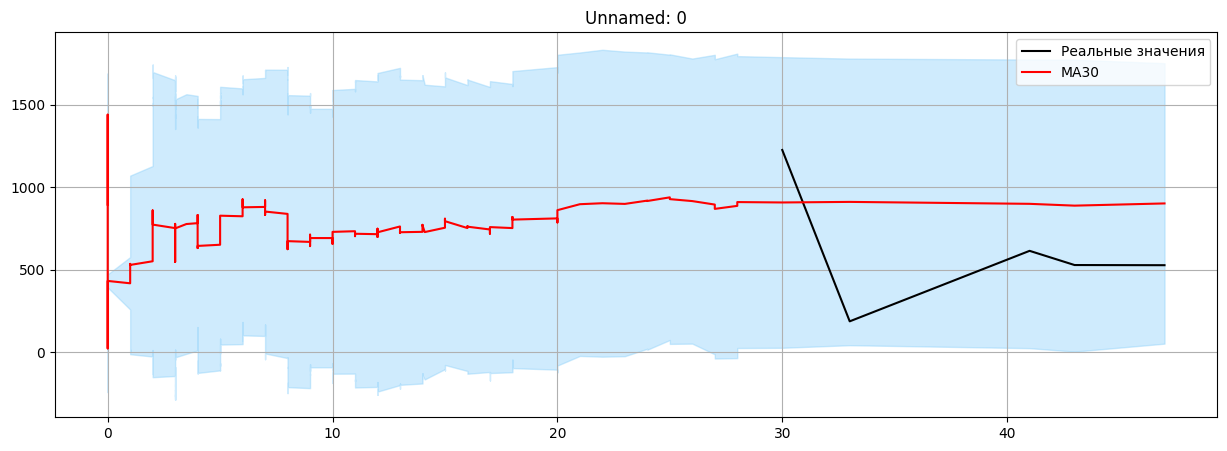

In [35]:
# указываем размер окна
window = 30

# вычисляем скользящее среднее и стандартное отклонение
rolling_mean = ts.rolling(window=window).mean()
rolling_std = ts.rolling(window=window).std()

plt.figure(figsize=(15,5))
plt.title(ts.name)
plt.plot(ts[window:], label='Реальные значения', color="black")

# отрисовываем скользящее среднее
plt.plot(rolling_mean, 'g', label='MA'+str(window),
             color="red")

# отрисовываем верхний и нижний интервалы
lower_bound = rolling_mean - (1.96 * rolling_std)
upper_bound = rolling_mean + (1.96 * rolling_std)

plt.fill_between(x=ts.index, y1=lower_bound, y2=upper_bound,
                 color='lightskyblue', alpha=0.4)
plt.legend(loc='best')
# показываем сетку на графике
plt.grid(True)
plt.show()

Сезонность

<Figure size 1200x700 with 0 Axes>

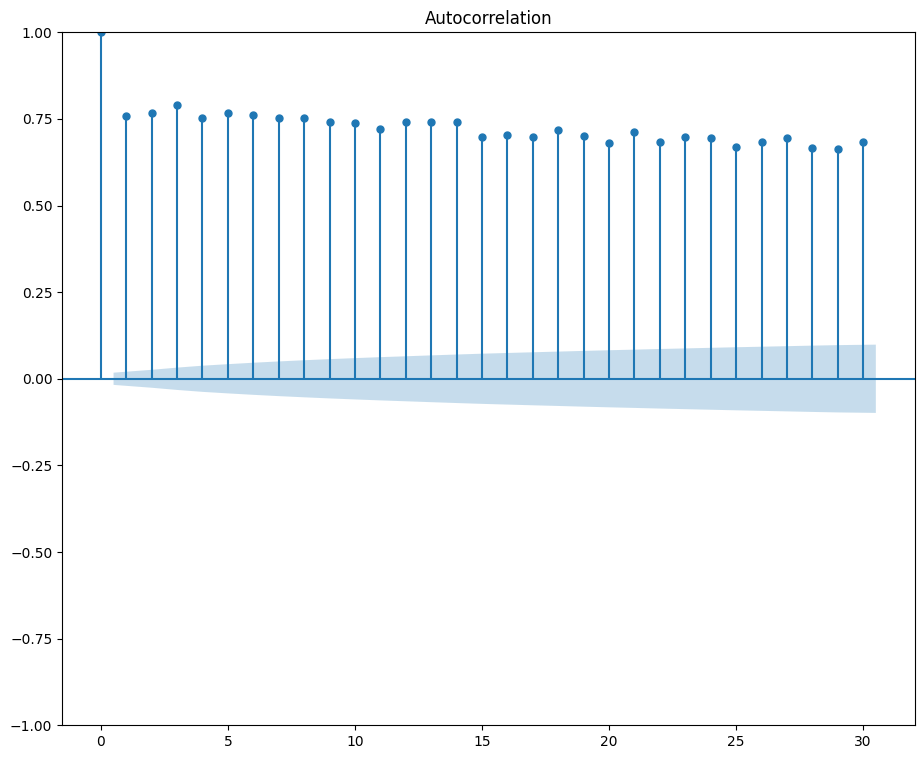

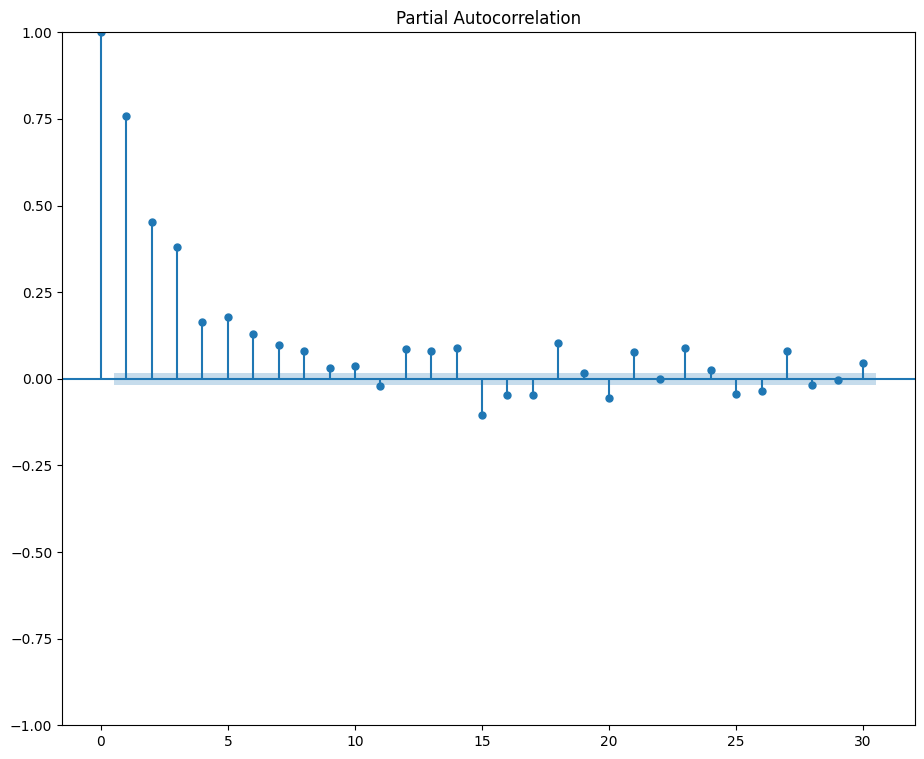

In [36]:
import statsmodels.tsa.api as smt


fig = plt.figure(figsize=(12, 7))
# рисуем автокорреляционную функцию
# 
# изображение отрисовывается с запаздываниями по горизонтали и корреляциями по
# вертикали
ac_plot = smt.graphics.plot_acf(ts, lags=30, alpha=0.5)

# есть также функция отрисовки частичной автокорреляции
pac_plot = smt.graphics.plot_pacf(ts, lags=30, alpha=0.5)

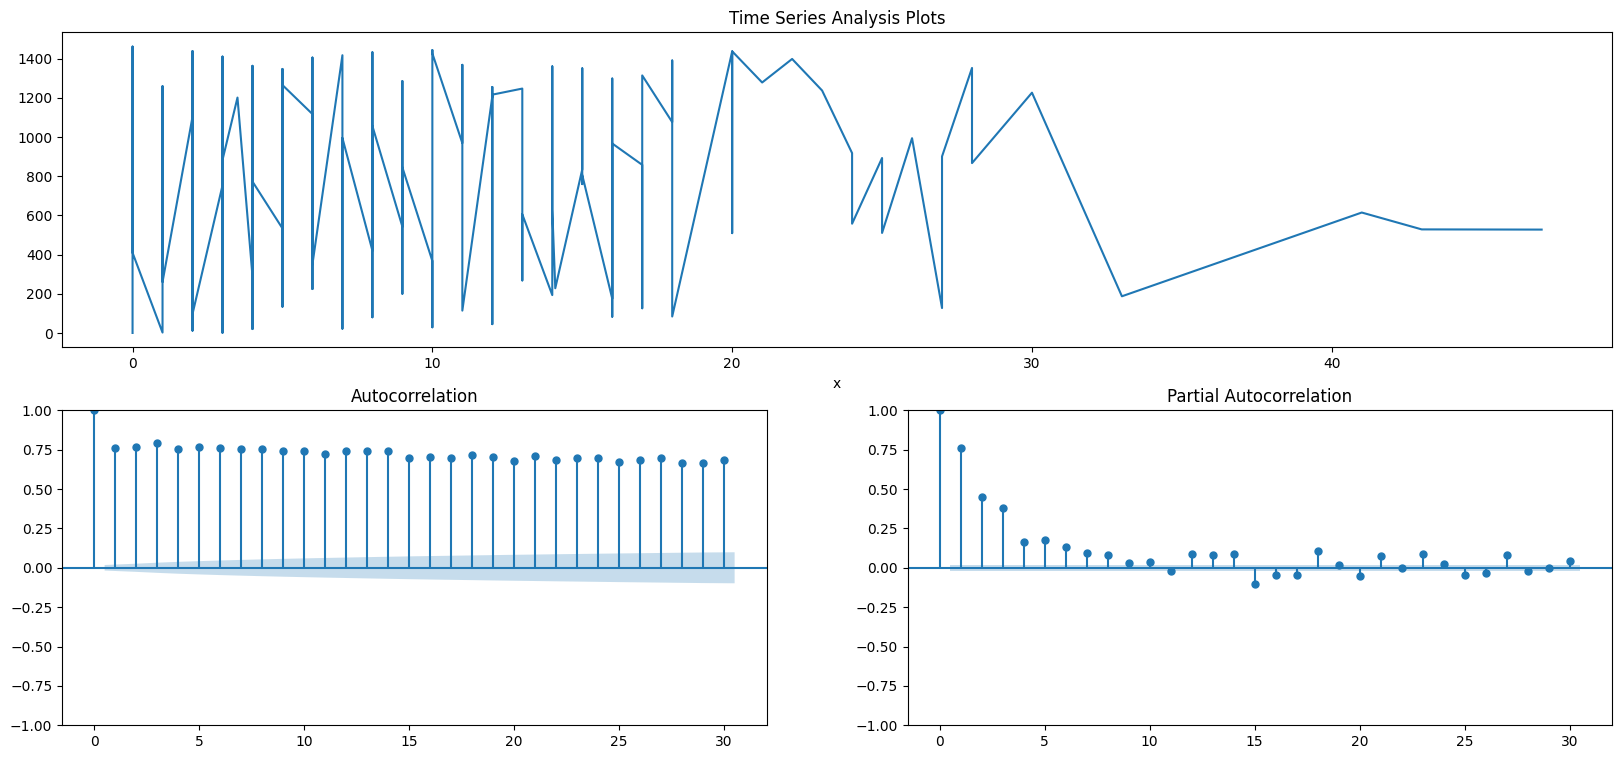

In [37]:
fig = plt.figure(figsize=(20, 9))
layout = (2, 2)
ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
acf_ax = plt.subplot2grid(layout, (1, 0))
pacf_ax = plt.subplot2grid(layout, (1, 1))

ts.plot(ax=ts_ax)
ts_ax.set_title('Time Series Analysis Plots')
smt.graphics.plot_acf(ts, lags=30, ax=acf_ax, alpha=0.5)
smt.graphics.plot_pacf(ts, lags=30, ax=pacf_ax, alpha=0.5)
None